In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
from statsmodels.tsa.stattools import acf

np.random.seed(42)

# 1️⃣ GOOD: white noise residuals
n = 200
resid_good = np.random.normal(0, 1, n)

# 2️⃣ BAD: autocorrelation + non-normal + heteroscedastic
# AR(1) with heteroscedasticity & skew
resid_bad = []
e = np.random.normal(0, 1, n)
for i in range(n):
    if i == 0:
        val = e[i]
    else:
        val = 0.8 * resid_bad[i-1] + e[i]  # autocorrelation
    # add variance increase over time + skew
    val = val * (1 + 0.02 * i) + np.random.chisquare(2)
    resid_bad.append(val)
resid_bad = np.array(resid_bad)

# Function for QQ plot data
def qq_plot_data(residuals):
    sorted_resid = np.sort(residuals)
    theoretical_quantiles = stats.norm.ppf((np.arange(1, len(residuals)+1) - 0.5) / len(residuals))
    return theoretical_quantiles, sorted_resid

# Start grid: 4 rows, 2 cols
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=(
        "Good: Residuals", "Bad: Residuals",
        "Good: Histogram", "Bad: Histogram",
        "Good: QQ Plot", "Bad: QQ Plot",
        "Good: ACF", "Bad: ACF"
    )
)

# Row 1: Residual plot
fig.add_trace(go.Scatter(y=resid_good, mode="lines", name="Good Residuals"), row=1, col=1)
fig.add_trace(go.Scatter(y=resid_bad, mode="lines", name="Bad Residuals"), row=1, col=2)

# Row 2: Histogram
fig.add_trace(go.Histogram(x=resid_good, nbinsx=30, histnorm="probability density", name="Good Histogram"), row=2, col=1)
fig.add_trace(go.Histogram(x=resid_bad, nbinsx=30, histnorm="probability density", name="Bad Histogram"), row=2, col=2)

# Row 3: QQ plot
q_theor_good, q_sample_good = qq_plot_data(resid_good)
q_theor_bad, q_sample_bad = qq_plot_data(resid_bad)

fig.add_trace(go.Scatter(x=q_theor_good, y=q_sample_good, mode="markers", name="Good QQ"), row=3, col=1)
fig.add_trace(go.Scatter(x=q_theor_bad, y=q_sample_bad, mode="markers", name="Bad QQ"), row=3, col=2)

# Add 45-degree reference lines to QQ plots
for c in [1, 2]:
    fig.add_trace(go.Scatter(x=[-3, 3], y=[-3, 3], mode="lines", line=dict(color="black", dash="dash"), showlegend=False), row=3, col=c)

# Row 4: ACF
lags = np.arange(0, 41)
acf_good = acf(resid_good, nlags=40)
acf_bad = acf(resid_bad, nlags=40)

fig.add_trace(go.Bar(x=lags, y=acf_good, name="Good ACF"), row=4, col=1)
fig.add_trace(go.Bar(x=lags, y=acf_bad, name="Bad ACF"), row=4, col=2)

fig.update_layout(
    title_text="Diagnostics: Good vs Bad Residuals",
    height=1200,
    width=1000,
    showlegend=False
)

fig.show()

TypeError: Axes.stem() got an unexpected keyword argument 'use_line_collection'

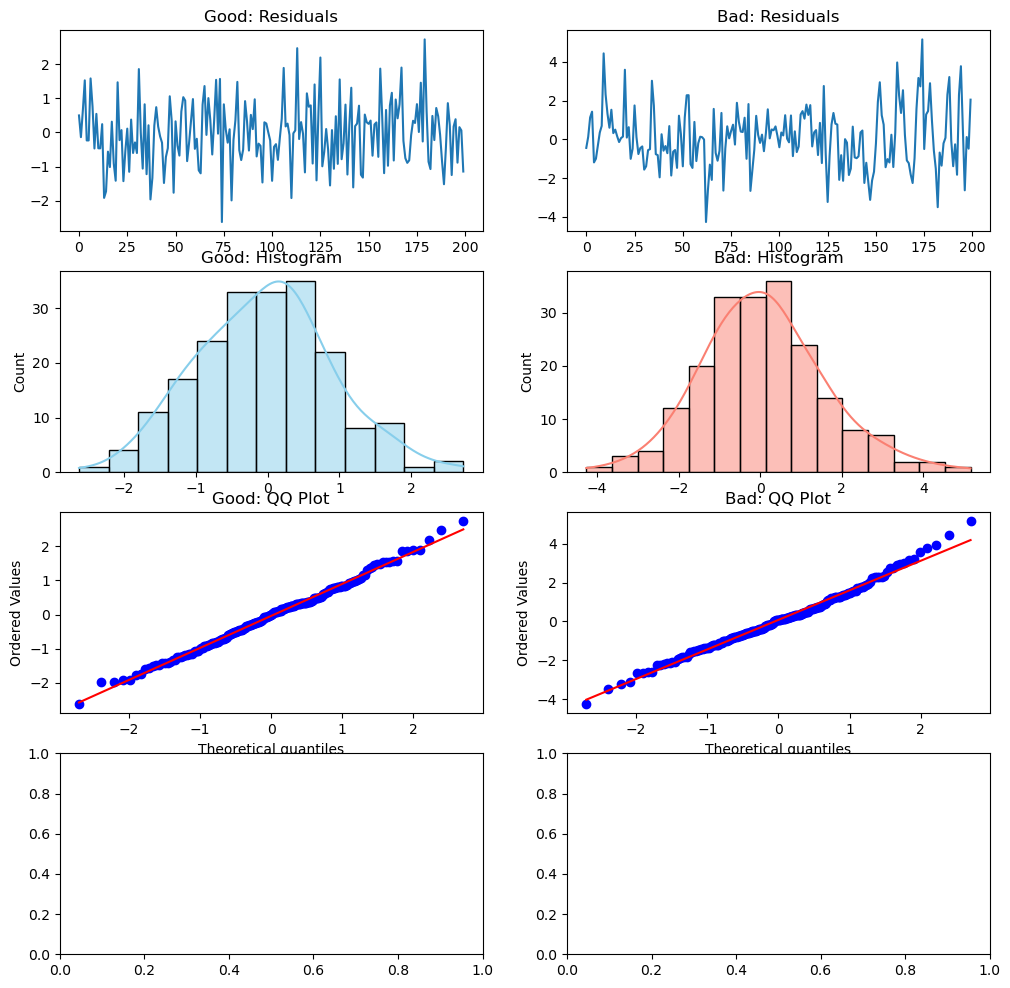

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf
import scipy.stats as stats

np.random.seed(42)

n = 200

# 1️⃣ GOOD residuals: white noise
resid_good = np.random.normal(0, 1, n)
resid_bad = []
e = np.random.normal(0, 1, n)
for i in range(n):
    noise = e[i] + np.random.normal(0, 0.5)  # add mild extra noise
    if i == 0:
        val = noise
    else:
        val = 0.3 * resid_bad[i - 1] + noise  # mild autocorrelation
    val *= 1 + 0.003 * i  # VERY light variance drift
    resid_bad.append(val)
resid_bad = np.array(resid_bad)
# Prepare figure grid
fig, ax = plt.subplots(4, 2, figsize=(12, 12))

# Row 1: Residual plot
ax[0, 0].plot(resid_good)
ax[0, 0].set_title("Good: Residuals")
ax[0, 1].plot(resid_bad)
ax[0, 1].set_title("Bad: Residuals")

# Row 2: Histogram + KDE
sns.histplot(resid_good, kde=True, ax=ax[1, 0], color="skyblue")
ax[1, 0].set_title("Good: Histogram")
sns.histplot(resid_bad, kde=True, ax=ax[1, 1], color="salmon")
ax[1, 1].set_title("Bad: Histogram")

# Row 3: QQ Plot
stats.probplot(resid_good, dist="norm", plot=ax[2, 0])
ax[2, 0].set_title("Good: QQ Plot")
stats.probplot(resid_bad, dist="norm", plot=ax[2, 1])
ax[2, 1].set_title("Bad: QQ Plot")

# Row 4: ACF
lags = 40
acf_good = acf(resid_good, nlags=lags)
acf_bad = acf(resid_bad, nlags=lags)
ax[3, 0].stem(range(lags + 1), acf_good, use_line_collection=True)
ax[3, 0].set_title("Good: ACF")
ax[3, 1].stem(range(lags + 1), acf_bad, use_line_collection=True)
ax[3, 1].set_title("Bad: ACF")

plt.tight_layout()
plt.show()


## Data

In [23]:
np.random.seed(42)
n = 200

# Good: white noise
resid_good = np.random.normal(0, 1, n)

# Bad: autocorr + variance drift + skew
resid_bad = []
e = np.random.normal(0, 1, n)
for i in range(n):
    noise = e[i] + np.random.chisquare(3) * 0.5  # skewed noise
    if i == 0:
        val = noise
    else:
        val = 0.3 * resid_bad[i - 1] + noise  # moderate autocorrelation
    val *= 1 + 0.01 * i  # moderate variance drift
    resid_bad.append(val)

resid_bad = np.array(resid_bad)

## Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 200

# Good residuals
resid_good = np.random.normal(0, 1, n)

# Bad residuals: mild autocorr + mild drift + mild skew
resid_bad = []
e = np.random.normal(0, 1, n)
for i in range(n):
    noise = e[i] + np.random.chisquare(3) * 0.3  # milder skew
    if i == 0:
        val = noise
    else:
        val = 0.3 * resid_bad[i - 1] + noise  # softer autocorrelation
    val *= 1 + 0.005 * i  # mild variance drift
    resid_bad.append(val)
resid_bad = np.array(resid_bad)


## Autocorrelation

### Plot

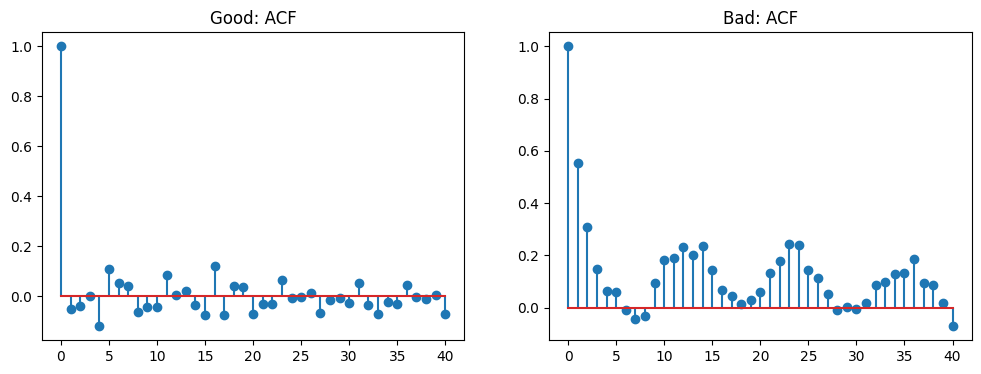

In [7]:
# ACF plot
from statsmodels.tsa.stattools import acf

lags = 40
acf_good = acf(resid_good, nlags=lags)
acf_bad = acf(resid_bad, nlags=lags)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].stem(range(lags + 1), acf_good)
ax[0].set_title("Good: ACF")
ax[1].stem(range(lags + 1), acf_bad)
ax[1].set_title("Bad: ACF")
plt.show()

### Test

In [8]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_good = acorr_ljungbox(resid_good, lags=[10, 20, 30], return_df=True)
lb_bad = acorr_ljungbox(resid_bad, lags=[10, 20, 30], return_df=True)

print("Ljung-Box Test (Good):\n", lb_good)
print("\nLjung-Box Test (Bad):\n", lb_bad)

Ljung-Box Test (Good):
       lb_stat  lb_pvalue
10   8.849179   0.546474
20  18.264036   0.570020
30  21.000649   0.887868

Ljung-Box Test (Bad):
        lb_stat     lb_pvalue
10   96.920755  2.248211e-16
20  143.901483  9.179677e-21
30  190.210326  3.304147e-25


## Normality

### Plot

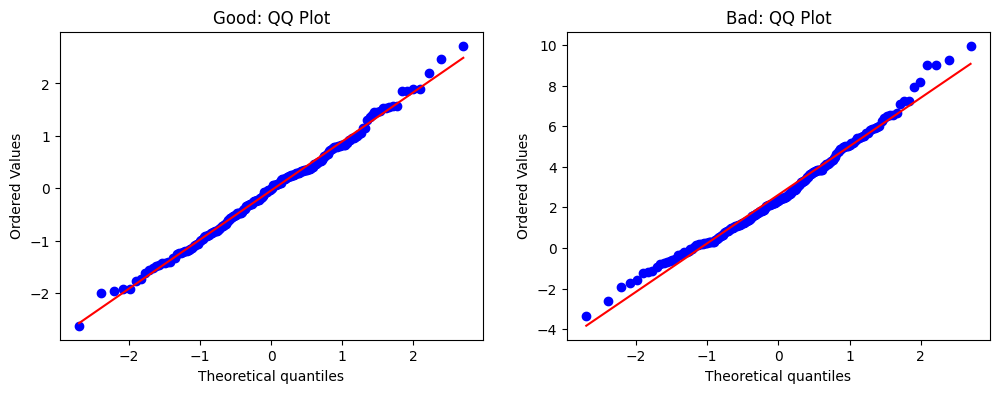

In [10]:
from scipy import stats

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
stats.probplot(resid_good, dist="norm", plot=ax[0])
ax[0].set_title("Good: QQ Plot")
stats.probplot(resid_bad, dist="norm", plot=ax[1])
ax[1].set_title("Bad: QQ Plot")
plt.show()

### Test

In [11]:
from scipy.stats import jarque_bera

jb_good = jarque_bera(resid_good)
jb_bad = jarque_bera(resid_bad)

print(
    f"Jarque-Bera (Good): Statistic={jb_good.statistic:.3f}, p-value={jb_good.pvalue:.3f}"
)
print(
    f"Jarque-Bera (Bad): Statistic={jb_bad.statistic:.3f}, p-value={jb_bad.pvalue:.3f}"
)

Jarque-Bera (Good): Statistic=0.585, p-value=0.746
Jarque-Bera (Bad): Statistic=6.925, p-value=0.031


## Homoscedasticity

### Plot

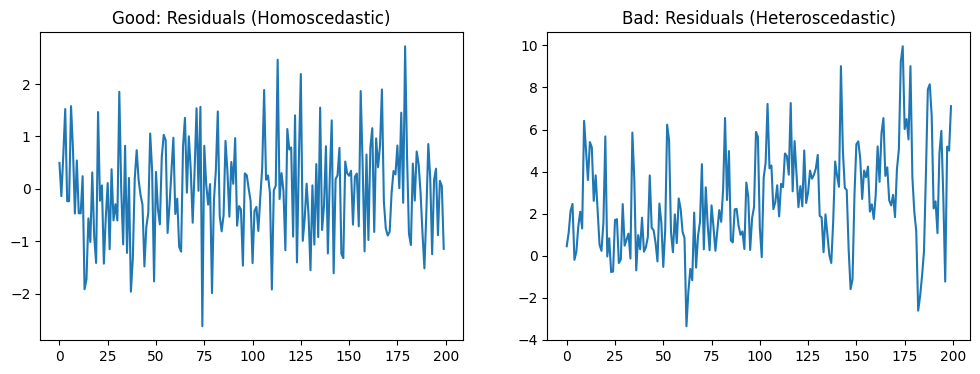

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(resid_good)
ax[0].set_title("Good: Residuals (Homoscedastic)")
ax[1].plot(resid_bad)
ax[1].set_title("Bad: Residuals (Heteroscedastic)")
plt.show()

### Test

In [13]:
from statsmodels.stats.diagnostic import het_arch

arch_good = het_arch(resid_good)
arch_bad = het_arch(resid_bad)

print(f"ARCH Test (Good): LM Stat={arch_good[0]:.3f}, p-value={arch_good[1]:.3f}")
print(f"ARCH Test (Bad): LM Stat={arch_bad[0]:.3f}, p-value={arch_bad[1]:.3f}")

ARCH Test (Good): LM Stat=7.342, p-value=0.693
ARCH Test (Bad): LM Stat=57.296, p-value=0.000


## Data

In [37]:
import numpy as np

np.random.seed(42)
n = 200

# Simulated true data: AR(1) process
true_data = []
e = np.random.normal(0, 1, n)
for i in range(n):
    if i == 0:
        val = e[i]
    else:
        val = 0.6 * true_data[i - 1] + e[i]  # AR(1) process
    true_data.append(val)
true_data = np.array(true_data)

# Now we apply two different model fits:

# 1️⃣ Good model: AR(1) (correct spec)
from statsmodels.tsa.ar_model import AutoReg

model_good = AutoReg(true_data, lags=1).fit()
resid_good = model_good.resid

# 2️⃣ Bad model: AR(0) (no AR terms - misconfigured)
model_bad = AutoReg(true_data, lags=0, old_names=False).fit()
resid_bad = model_bad.resid

## Autocorrelation

### Plot

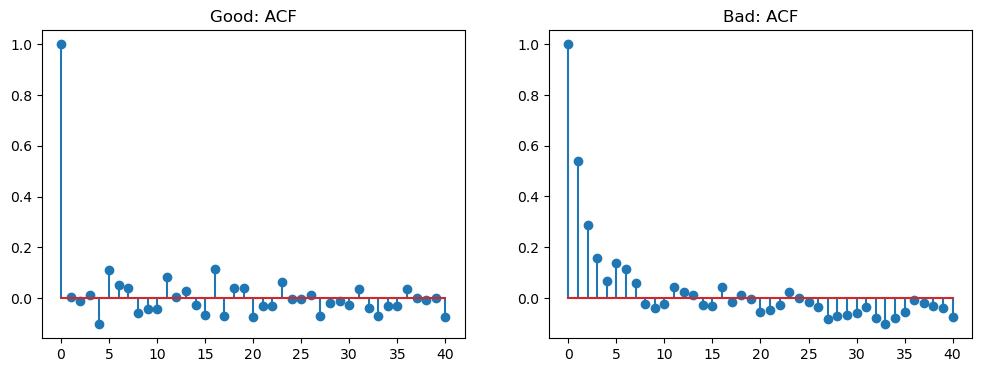

In [38]:
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

lags = 40
acf_good = acf(resid_good, nlags=lags)
acf_bad = acf(resid_bad, nlags=lags)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].stem(range(lags + 1), acf_good)
ax[0].set_title("Good: ACF")
ax[1].stem(range(lags + 1), acf_bad)
ax[1].set_title("Bad: ACF")
plt.show()

### Test

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_good = acorr_ljungbox(resid_good, lags=[10, 20, 30], return_df=True)
lb_bad = acorr_ljungbox(resid_bad, lags=[10, 20, 30], return_df=True)

print("Ljung-Box Test (Good):\n", lb_good)
print("\nLjung-Box Test (Bad):\n", lb_bad)

Ljung-Box Test (Good):
       lb_stat  lb_pvalue
10   8.849179   0.546474
20  18.264036   0.570020
30  21.000649   0.887868

Ljung-Box Test (Bad):
        lb_stat     lb_pvalue
10   96.920755  2.248211e-16
20  143.901483  9.179677e-21
30  190.210326  3.304147e-25


## Normality

### Plot

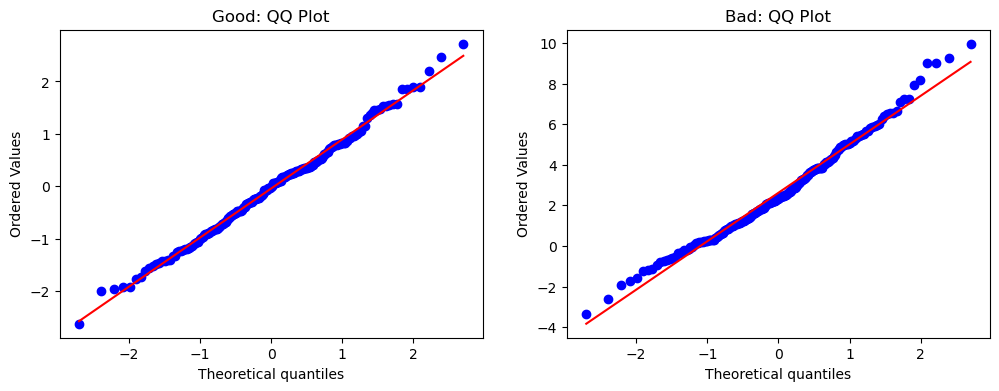

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
stats.probplot(resid_good, dist="norm", plot=ax[0])
ax[0].set_title("Good: QQ Plot")
stats.probplot(resid_bad, dist="norm", plot=ax[1])
ax[1].set_title("Bad: QQ Plot")
plt.show()

### Test

In [ ]:
from scipy.stats import jarque_bera

jb_good = jarque_bera(resid_good)
jb_bad = jarque_bera(resid_bad)

print(
    f"Jarque-Bera (Good): Statistic={jb_good.statistic:.3f}, p-value={jb_good.pvalue:.3f}"
)
print(
    f"Jarque-Bera (Bad): Statistic={jb_bad.statistic:.3f}, p-value={jb_bad.pvalue:.3f}"
)

Jarque-Bera (Good): Statistic=0.585, p-value=0.746
Jarque-Bera (Bad): Statistic=6.925, p-value=0.031


## Homoscedasticity

### Plot

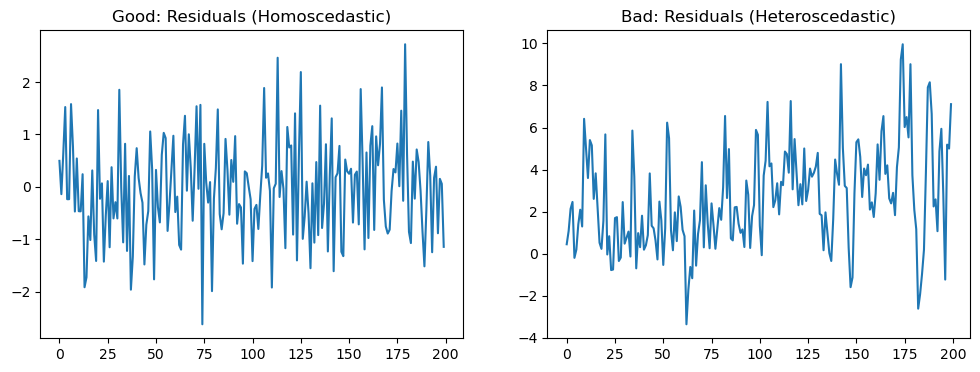

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(resid_good)
ax[0].set_title("Good: Residuals (Homoscedastic)")
ax[1].plot(resid_bad)
ax[1].set_title("Bad: Residuals (Heteroscedastic)")
plt.show()

### Test

In [ ]:
from statsmodels.stats.diagnostic import het_arch

arch_good = het_arch(resid_good)
arch_bad = het_arch(resid_bad)

print(f"ARCH Test (Good): LM Stat={arch_good[0]:.3f}, p-value={arch_good[1]:.3f}")
print(f"ARCH Test (Bad): LM Stat={arch_bad[0]:.3f}, p-value={arch_bad[1]:.3f}")

ARCH Test (Good): LM Stat=7.342, p-value=0.693
ARCH Test (Bad): LM Stat=57.296, p-value=0.000


### Log transformation reasoning

In [40]:
dfs = []

In [42]:
df_log = load_and_process_data("log", "../../../data/statsmodels/AirPassengers_log.parquet")
dfs.append(df_log)

In [ ]:
df = pd.concat(dfs).reset_index(names="datetime").dropna().sort_values(by="datetime")
df


,datetime,values,vtype,diff
0,1949-01-31,112.000000,original,False
288,1949-01-31,4.718499,log,False
...,...,...,...,...
431,1960-12-31,6.068426,log,False
575,1960-12-31,0.102279,log,True


### Plot

In [ ]:
fig = df.plot(x='datetime', y='values', facet_row='diff', facet_col='vtype')
fig.update_yaxes(matches=None)

### Test

In [ ]:
df

,datetime,values,vtype,diff
0,1949-01-31,112.000000,original,False
288,1949-01-31,4.718499,log,False
...,...,...,...,...
431,1960-12-31,6.068426,log,False
575,1960-12-31,0.102279,log,True


In [ ]:
from statsmodels.tsa.stattools import adfuller

data = []
for (diff, vtype),g in df.groupby(['diff', 'vtype']):
    v = g['values'].dropna()
    results = adfuller(v)
    data.append({
        'vtype': vtype,
        'diff': diff,
        'adf': results[0],
        'pvalue': results[1],
    })

pd.DataFrame(data).pivot(index='vtype', columns='diff', values='pvalue')

diff,False,True
vtype,,
log,0.422367,0.071121
original,0.991880,0.054213
